In [1]:
!pip install lime


     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ----- ------------------------------- 41.0/275.7 kB 279.3 kB/s eta 0:00:01
     --------- --------------------------- 71.7/275.7 kB 391.3 kB/s eta 0:00:01
     -------------------- --------------- 153.6/275.7 kB 702.7 kB/s eta 0:00:01
     ------------------------------------ - 266.2/275.7 kB 1.0 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0

In [3]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer

model = RobertaForSequenceClassification.from_pretrained('fine_tuned_roberta1')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


In [4]:
def predict_fn(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    return logits

In [23]:
text_samples = ["the box is very simple....the charger is not a cube like apple."]


In [24]:
import pandas as pd
import numpy as np
import scipy as sp
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification


In [25]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=["ChatGPT", "Human"])

explanations = []
for text in text_samples:
    explanation = explainer.explain_instance(text, predict_fn, num_features=10)
    explanations.append(explanation)

In [26]:

import json

explanations_data = []
for explanation in explanations:
    explanations_data.append(explanation.as_list())


Explanation for Text Sample 1 - True Class: -1.8527497053146362
Text Sample 1: the box is very simple....the charger is not a cube like apple.
1. is: -1.0486044739377083
2. box: 0.6038629269717133
3. charger: 0.44230852869112536
4. simple: -0.33319512262634027
5. apple: -0.3305175066126639
6. like: 0.3206808343541717
7. a: -0.3161512489310086
8. cube: -0.1952886077872411
9. the: -0.1339612857349011
10. very: 0.060253607253767556


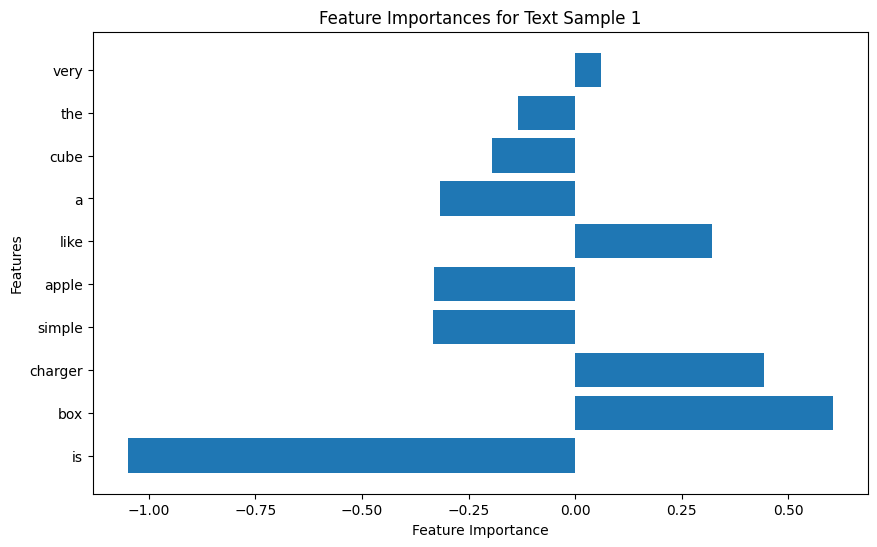

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of features to display
num_features = 10

# Iterate over explanations
for i, explanation in enumerate(explanations):
    print(f"Explanation for Text Sample {i + 1} - True Class: {explanation.predict_proba[1]}")

    # Get feature names and importances
    feature_names = explanation.as_list(label=1)  # Use label 1 for "Human" class
    feature_names = feature_names[:num_features]  # Slice to limit to num_features
    feature_names, feature_importances = zip(*feature_names)
    print(f"Text Sample {i + 1}: {text_samples[i]}")

    for j, feature_name in enumerate(feature_names):
        print(f"{j + 1}. {feature_name}: {feature_importances[j]}")
    # Create a horizontal bar chart to visualize feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(np.arange(len(feature_names)), feature_importances, align='center')  # Use len(feature_names) as the number of features
    plt.yticks(np.arange(len(feature_names)), feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(f'Feature Importances for Text Sample {i + 1}')
    plt.show()

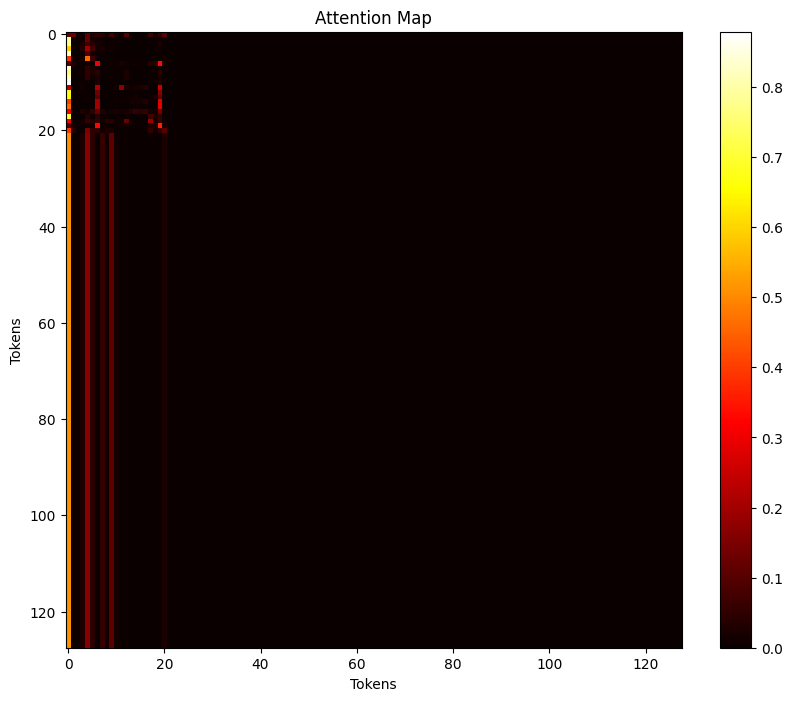

In [35]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import matplotlib.pyplot as plt

# Path to your fine-tuned RoBERTa model's tokenizer directory
model_path = 'fine_tuned_roberta1'  # Replace with the correct path to the tokenizer directory
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained(model_path)

# Define your input text
input_text = "Your input text goes here. This could be a sentence or a piece of text for analysis."

# Tokenize the input text
inputs = tokenizer.encode_plus(
    input_text,
    add_special_tokens=True,
    return_tensors='pt',
    return_attention_mask=True,
    padding='max_length',
    truncation=True,
    max_length=128  # Adjust this based on your model's input length
)

# Forward pass through the model
outputs = model(**inputs, output_attentions=True)  # Set output_attentions=True to retrieve attention weights

# Extract attention weights from the model
attentions = outputs.attentions

# Plot the attention weights if available
if attentions:
    plt.figure(figsize=(10, 8))
    plt.imshow(attentions[-1][0][0].detach().cpu().numpy(), cmap='hot', interpolation='nearest')
    plt.xlabel('Tokens')
    plt.ylabel('Tokens')
    plt.title('Attention Map')
    plt.colorbar()
    plt.show()
else:
    print("Attention weights not available.")


In [42]:
import pandas as pd
import json
import random
from lime.lime_text import LimeTextExplainer

# Load your labeled data from the CSV file
data = pd.read_csv('labeled-dataset.csv')

# Sample 200 random texts from the data
text_samples = data['text'].sample(n=1, random_state=42).tolist()

from transformers import RobertaForSequenceClassification, RobertaTokenizer

model = RobertaForSequenceClassification.from_pretrained('fine_tuned_roberta1')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Replace this with your predict function for the fine-tuned RoBERTa model
def predict_fn(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    return logits

# LimeTextExplainer instance
explainer = LimeTextExplainer()

# Number of features to display
num_features = 10

# List to store text samples and their feature importances as dictionaries
data = []

# Iterate over text samples for explanations
for text in text_samples:
    explanation = explainer.explain_instance(text, predict_fn, num_features=num_features)
    feature_dict = {}
    feature_dict['text'] = text

    # Get feature names and importances
    feature_names = explanation.as_list(label=1)  # Use label 1 for "Human" class
    feature_names = feature_names[:num_features]  # Limit to num_features
    feature_names, feature_importances = zip(*feature_names)

    # Store top features and their importances in a dictionary
    features_data = {}
    for j, feature_name in enumerate(feature_names):
        features_data[f"Feature {j + 1}"] = {
            "Name": feature_name,
            "Importance": feature_importances[j]
        }

    feature_dict['top_features'] = features_data
    data.append(feature_dict)

# Save the data to a JSON file
with open('text_samples_features.json', 'w') as outfile:
    json.dump(data, outfile, indent=4)

print("Data saved to text_samples_features.json")


Data saved to text_samples_features.json


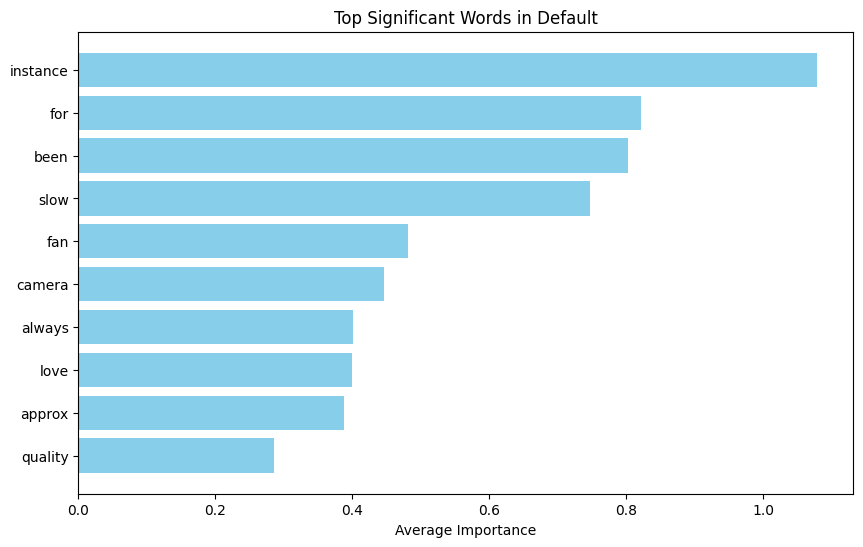

In [55]:
import json
import matplotlib.pyplot as plt

# Load your data from the JSON file
with open('text_samples_features.json', 'r') as file:
    data = json.load(file)

# Dictionary to store word importance per context/topic
word_importance_per_context = {}

# Iterate over each text sample
for sample in data:
    text = sample['text']
    top_features = sample['top_features']

    # Extract context or topic information (adjust this based on your data)
    context = "Default"  # Replace this with the actual context or topic information

    # Update word importance for the current context
    if context not in word_importance_per_context:
        word_importance_per_context[context] = {}

    for feature_name, feature_info in top_features.items():
        word = feature_info['Name']
        importance = feature_info['Importance']

        if word not in word_importance_per_context[context]:
            word_importance_per_context[context][word] = []

        word_importance_per_context[context][word].append(importance)

# Calculate average importance per word for each context
average_word_importance_per_context = {}
for context, word_importance in word_importance_per_context.items():
    average_word_importance = {}
    for word, importance_list in word_importance.items():
        average_importance = sum(importance_list) / len(importance_list)
        average_word_importance[word] = average_importance
    average_word_importance_per_context[context] = average_word_importance

# Plot top significant words for each context
for context, word_importance in average_word_importance_per_context.items():
    sorted_words = sorted(word_importance.items(), key=lambda x: x[1], reverse=True)
    top_words = dict(sorted_words[:10])  # Select top 10 significant words per context

    plt.figure(figsize=(10, 6))
    plt.barh(list(top_words.keys()), list(top_words.values()), color='skyblue')
    plt.xlabel('Average Importance')
    plt.title(f'Top Significant Words in {context}')
    plt.gca().invert_yaxis()
    plt.show()


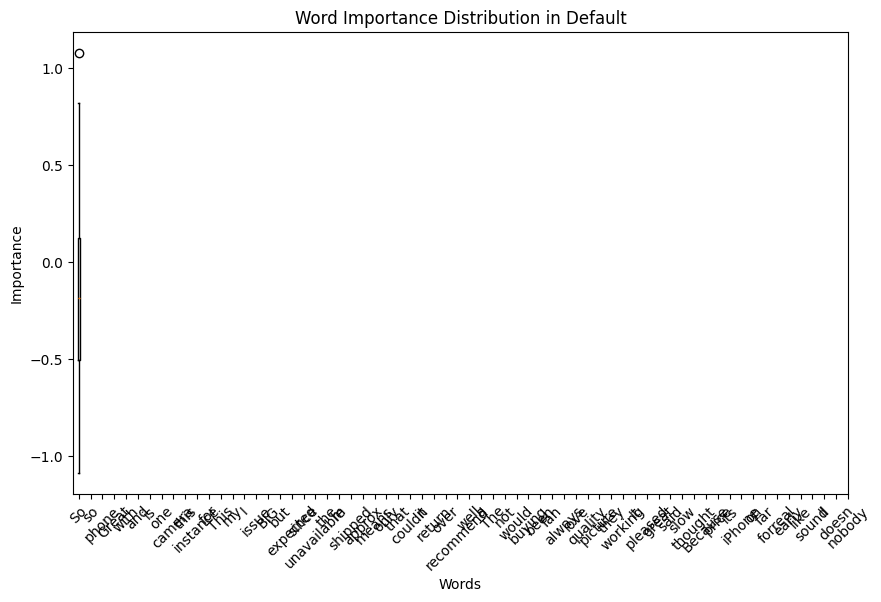

In [57]:
for context, word_importance in average_word_importance_per_context.items():
    plt.figure(figsize=(10, 6))
    plt.boxplot(word_importance.values())
    plt.xticks(range(1, len(word_importance) + 1), word_importance.keys(), rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Importance')
    plt.title(f'Word Importance Distribution in {context}')
    plt.show()


In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

for context, word_importance in average_word_importance_per_context.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_importance)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {context}')
    plt.show()


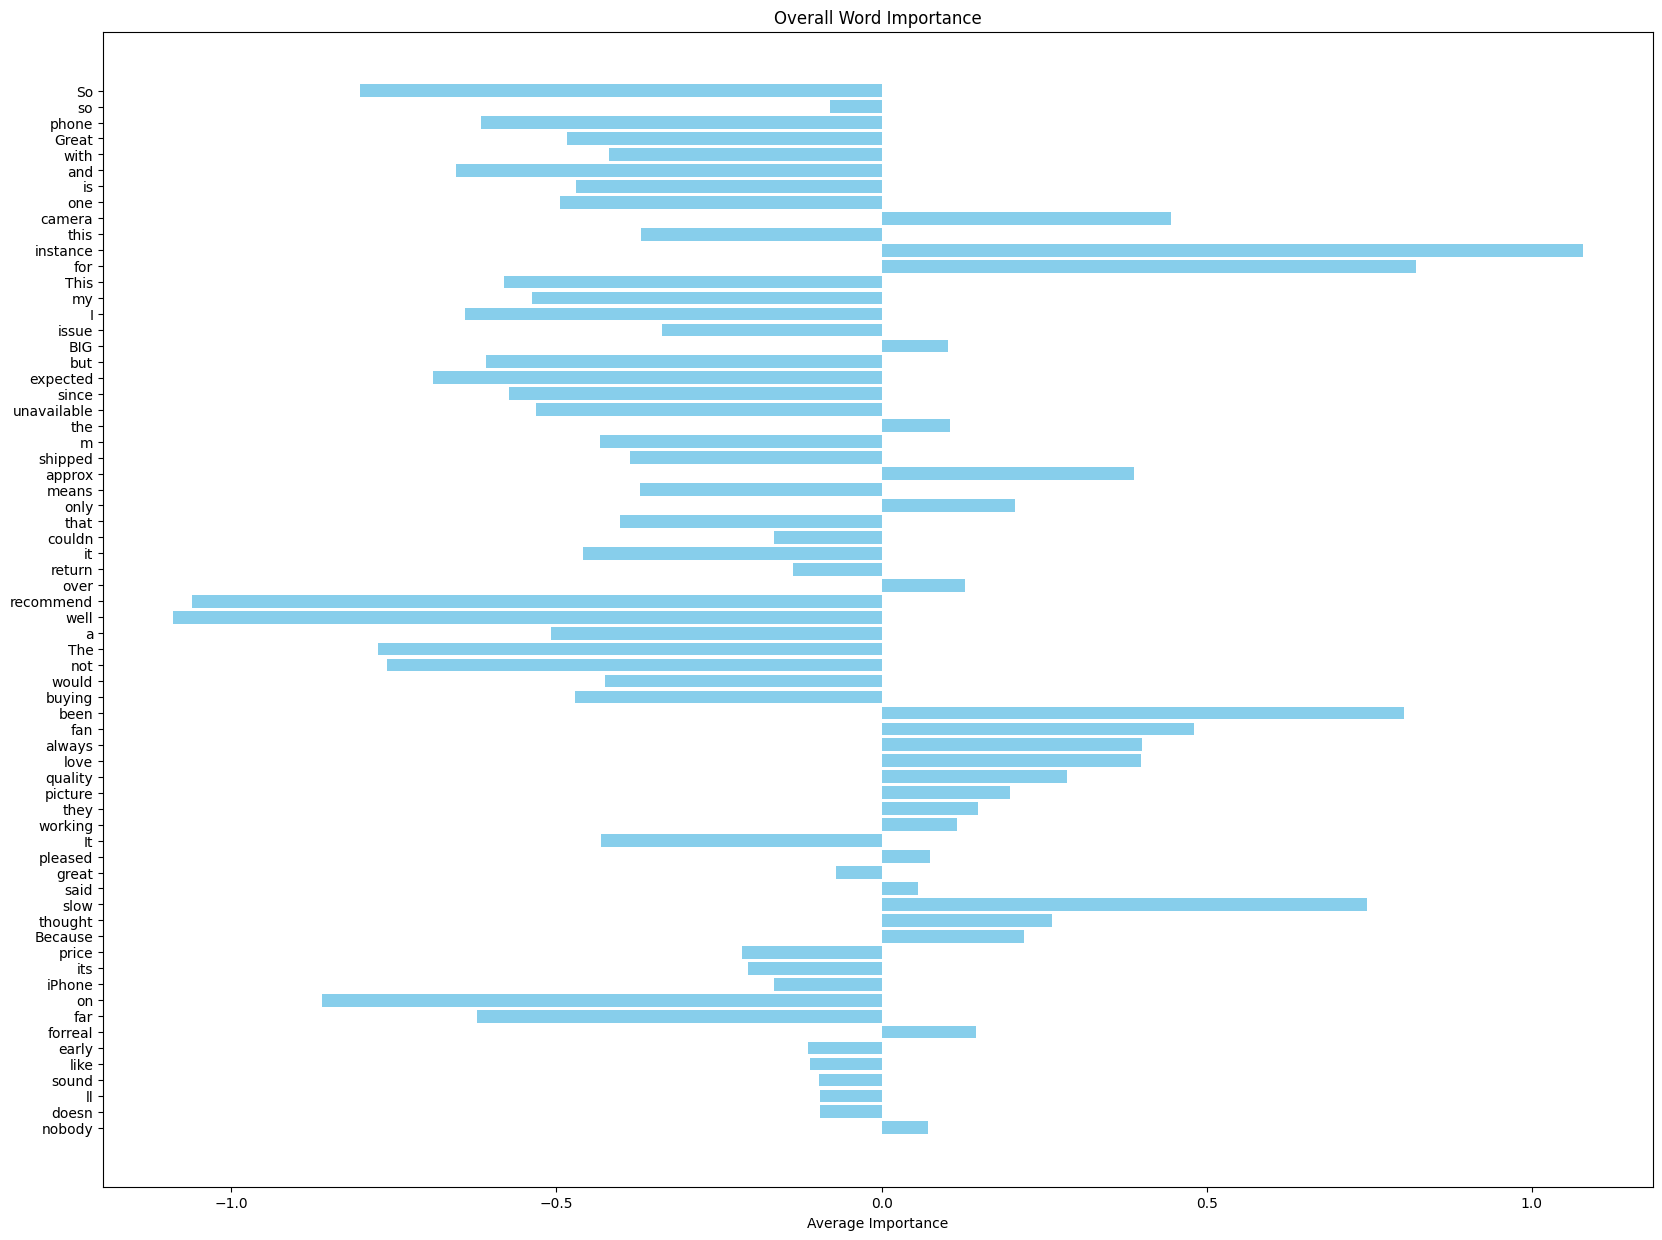

In [69]:
overall_word_importance = {}
for context, word_importance in average_word_importance_per_context.items():
    for word, importance in word_importance.items():
        if word not in overall_word_importance:
            overall_word_importance[word] = []
        overall_word_importance[word].append(importance)

overall_average_word_importance = {word: sum(importance_list) / len(importance_list) for word, importance_list in overall_word_importance.items()}

plt.figure(figsize=(20,15))
plt.barh(list(overall_average_word_importance.keys()), list(overall_average_word_importance.values()), color='skyblue')
plt.xlabel('Average Importance')
plt.title('Overall Word Importance')
plt.gca().invert_yaxis()
plt.show()


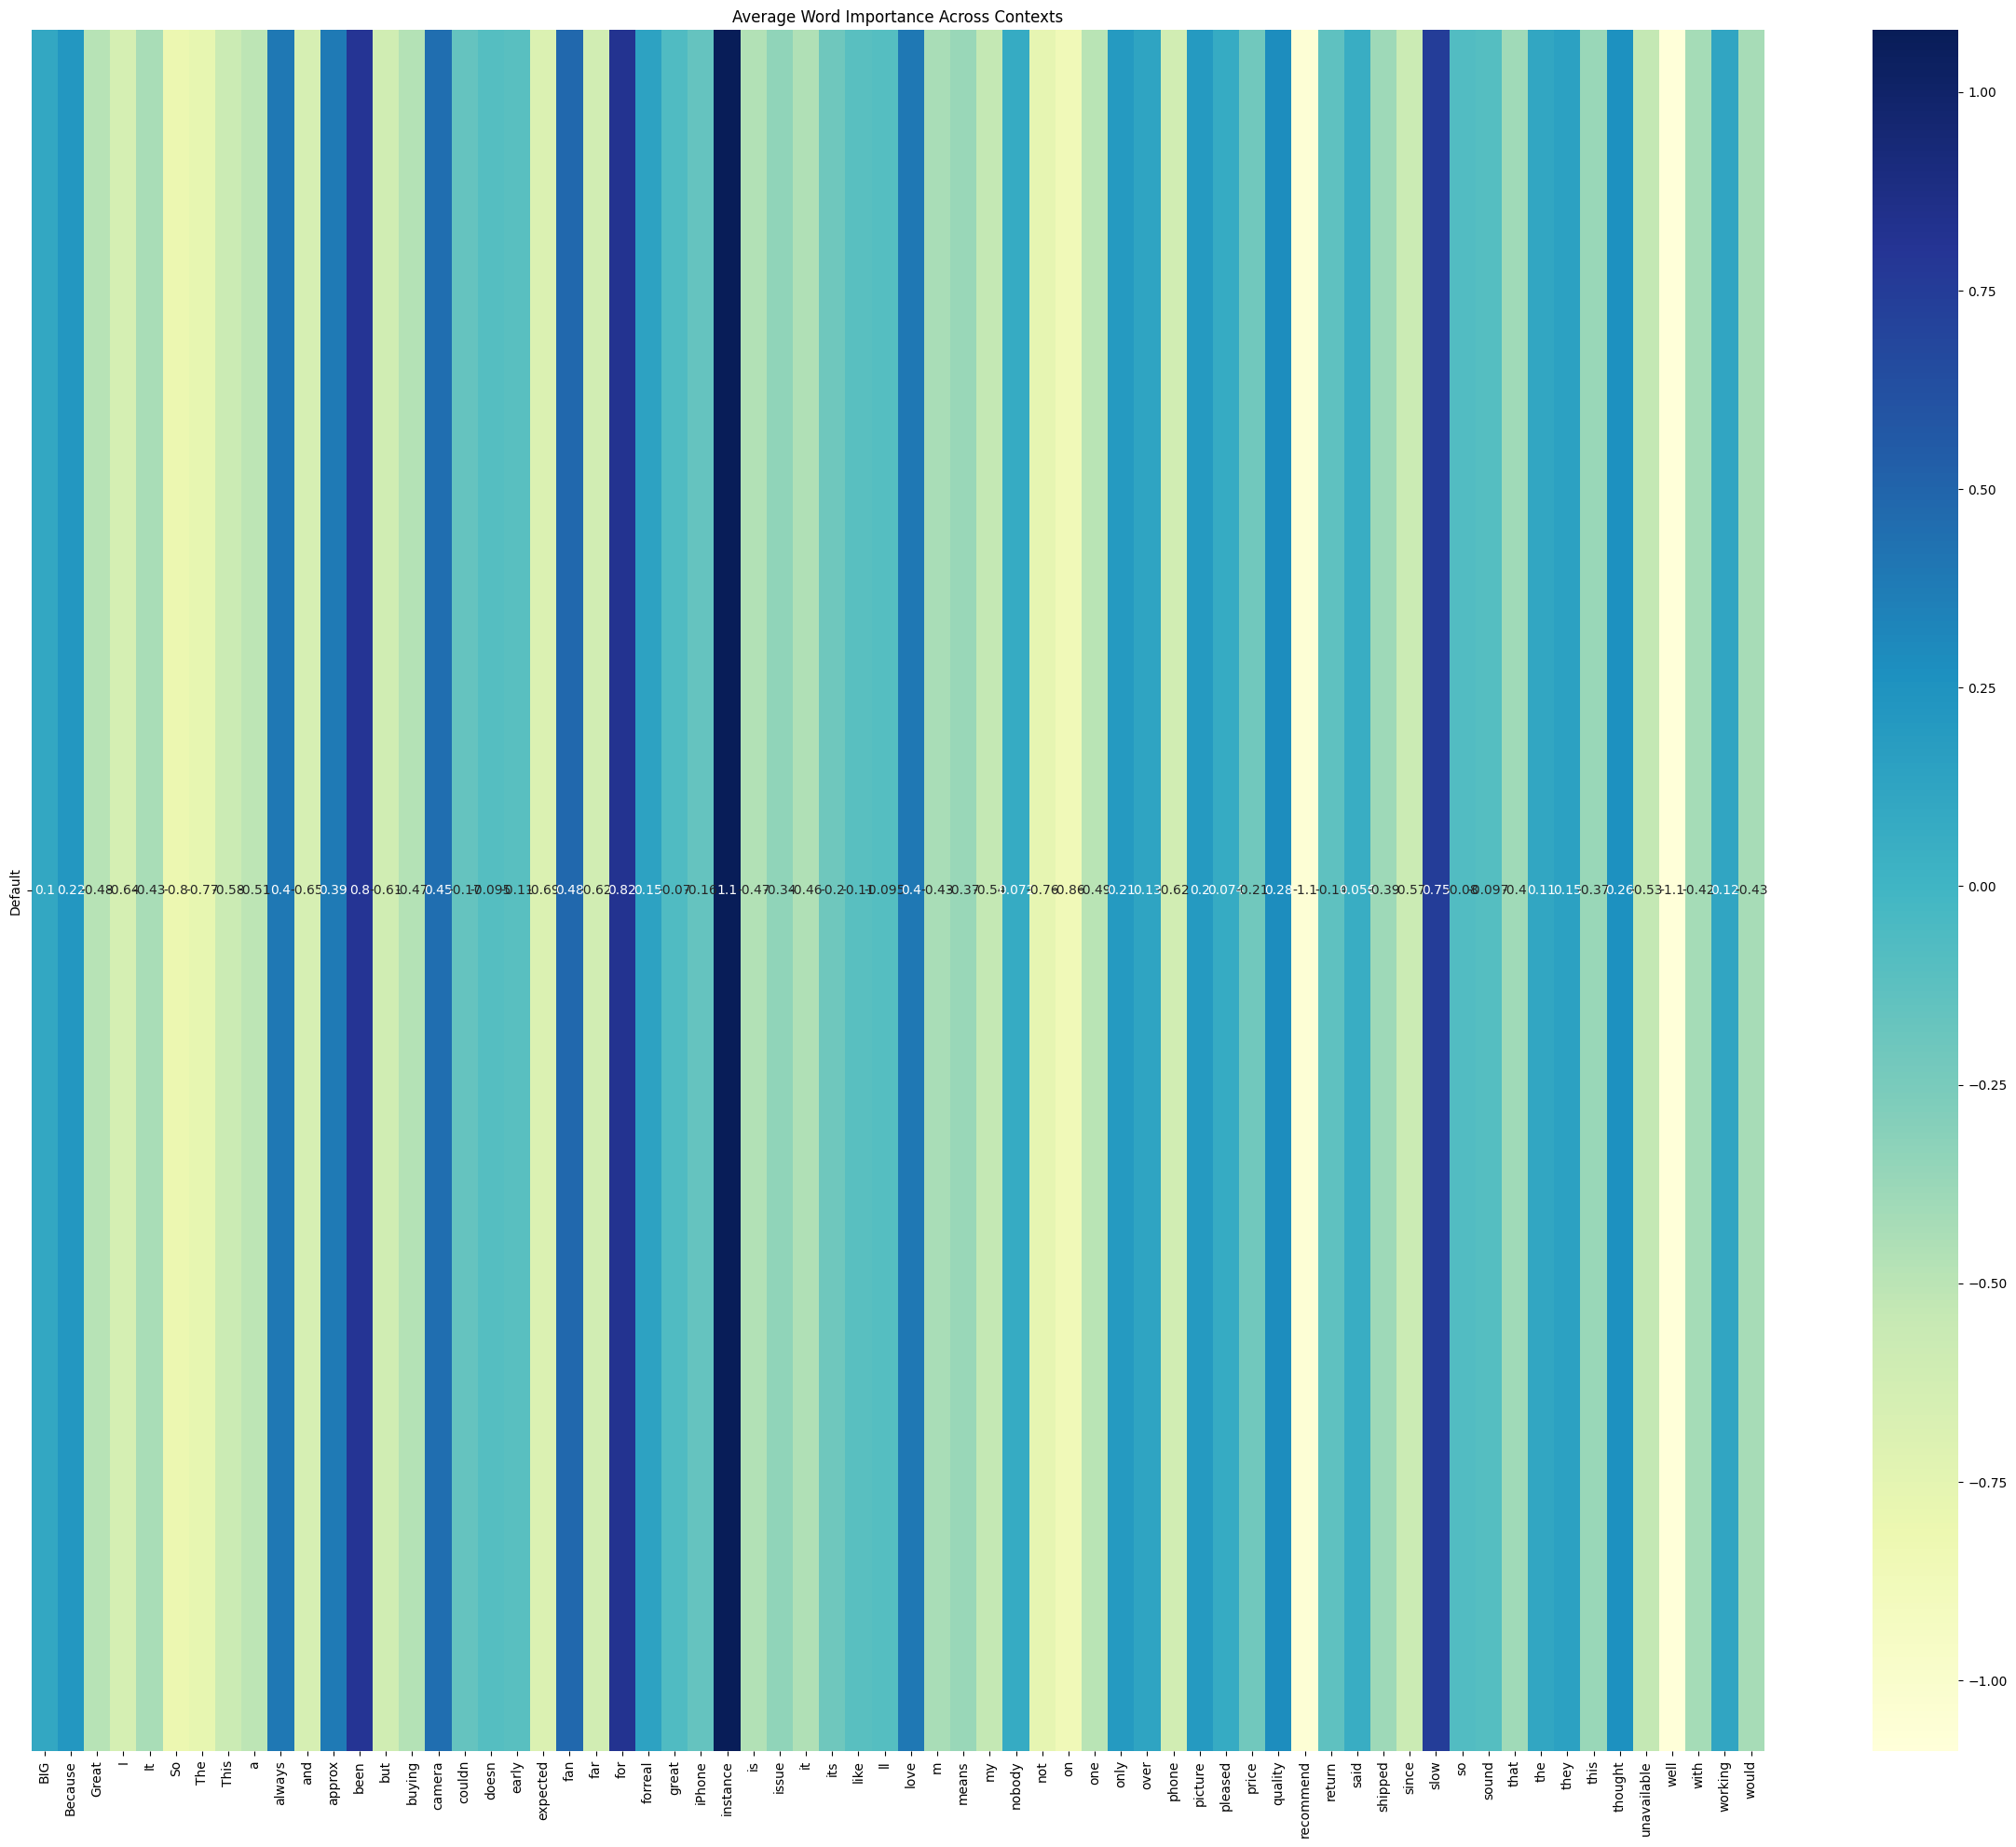

In [71]:
!pip install seaborn
import seaborn as sns

word_importance_df = pd.DataFrame(average_word_importance_per_context)
plt.figure(figsize=(30, 24))
sns.heatmap(word_importance_df.T, cmap='YlGnBu', annot=True)
plt.title('Average Word Importance Across Contexts')
plt.show()


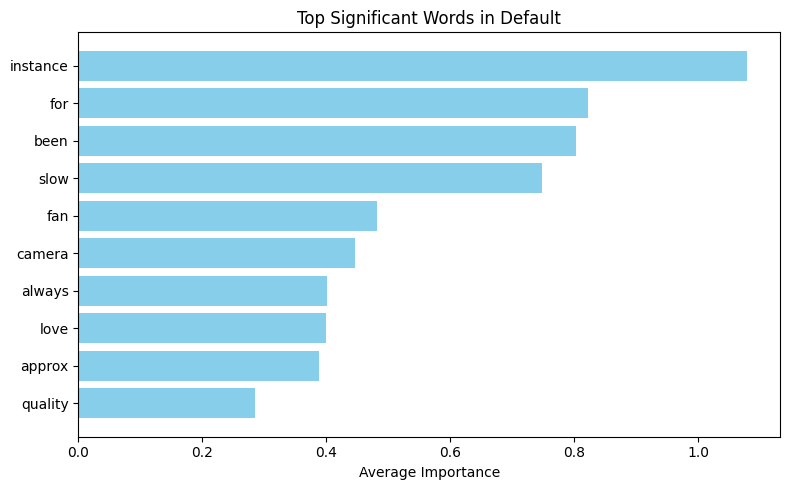

In [64]:
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your data from the JSON file
with open('text_samples_features.json', 'r') as file:
    data = json.load(file)

# Dictionary to store word importance per context/topic
word_importance_per_context = {}

# Iterate over each text sample
for sample in data[:10]:  # Adjust the sample size for quicker visualization
    text = sample['text']
    top_features = sample['top_features']
    context = "Default"  # Replace this with the actual context or topic information

    # Update word importance for the current context
    if context not in word_importance_per_context:
        word_importance_per_context[context] = {}

    for feature_name, feature_info in top_features.items():
        word = feature_info['Name']
        importance = feature_info['Importance']

        if word not in word_importance_per_context[context]:
            word_importance_per_context[context][word] = []

        word_importance_per_context[context][word].append(importance)

# Calculate average importance per word for each context
average_word_importance_per_context = {}
for context, word_importance in word_importance_per_context.items():
    average_word_importance = {}
    for word, importance_list in word_importance.items():
        average_importance = sum(importance_list) / len(importance_list)
        average_word_importance[word] = average_importance
    average_word_importance_per_context[context] = average_word_importance

# Plot top significant words for each context
for context, word_importance in average_word_importance_per_context.items():
    sorted_words = sorted(word_importance.items(), key=lambda x: x[1], reverse=True)
    top_words = dict(sorted_words[:10])  # Select top 10 significant words per context

    plt.figure(figsize=(8, 5))  # Adjust the figure size
    plt.barh(list(top_words.keys()), list(top_words.values()), color='skyblue')
    plt.xlabel('Average Importance')
    plt.title(f'Top Significant Words in {context}')
    plt.gca().invert_yaxis()
    plt.tight_layout()  # Ensure tight layout for better presentation
    plt.show()


Sentiment Distribution for Human-written Reviews:
 0.0000    0.075359
 0.5719    0.011403
 0.6249    0.010412
 0.6369    0.010412
 0.7650    0.008924
             ...   
 0.5362    0.000496
 0.7561    0.000496
 0.1317    0.000496
-0.9121    0.000496
 0.5859    0.000496
Name: proportion, Length: 912, dtype: float64

Sentiment Distribution for ChatGPT-generated Reviews:
 0.0000    0.060486
 0.5719    0.009916
-0.4767    0.007933
 0.3182    0.006445
 0.6249    0.005949
             ...   
-0.7960    0.000496
 0.7074    0.000496
-0.5409    0.000496
 0.8854    0.000496
-0.7651    0.000496
Name: proportion, Length: 1099, dtype: float64


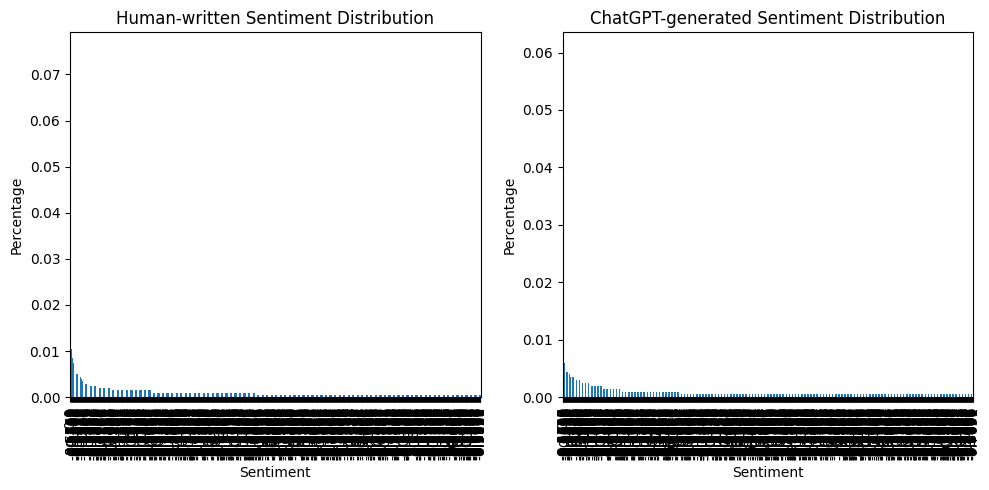

In [56]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load your labeled dataset
data = pd.read_csv('labeled-dataset.csv')

# Separate human-written and ChatGPT-generated reviews based on labels
human_reviews = data[data['label'] == 1]['text'].tolist()
chatgpt_reviews = data[data['label'] == 0]['text'].tolist()

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(reviews):
    sentiment_scores = []
    for review in reviews:
        sentiment_scores.append(sia.polarity_scores(review)['compound'])
    return sentiment_scores

# Get sentiment scores for each category
human_sentiments = get_sentiment_scores(human_reviews)
chatgpt_sentiments = get_sentiment_scores(chatgpt_reviews)

# Calculate sentiment distributions
human_sentiment_distribution = pd.Series(human_sentiments).value_counts(normalize=True)
chatgpt_sentiment_distribution = pd.Series(chatgpt_sentiments).value_counts(normalize=True)

# Output statements to display sentiment distributions
print("Sentiment Distribution for Human-written Reviews:")
print(human_sentiment_distribution)

print("\nSentiment Distribution for ChatGPT-generated Reviews:")
print(chatgpt_sentiment_distribution)

# Visualize sentiment distributions for comparison
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Human-written Sentiment Distribution')
human_sentiment_distribution.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')

plt.subplot(1, 2, 2)
plt.title('ChatGPT-generated Sentiment Distribution')
chatgpt_sentiment_distribution.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()


In [54]:
print("Sentiment Distribution for Human-written Reviews:")
print([human_sentiment_distribution])

print("\nSentiment Distribution for ChatGPT-generated Reviews:")
print(chatgpt_sentiment_distribution)


Sentiment Distribution for Human-written Reviews:


KeyError: 1

In [10]:
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fusion\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

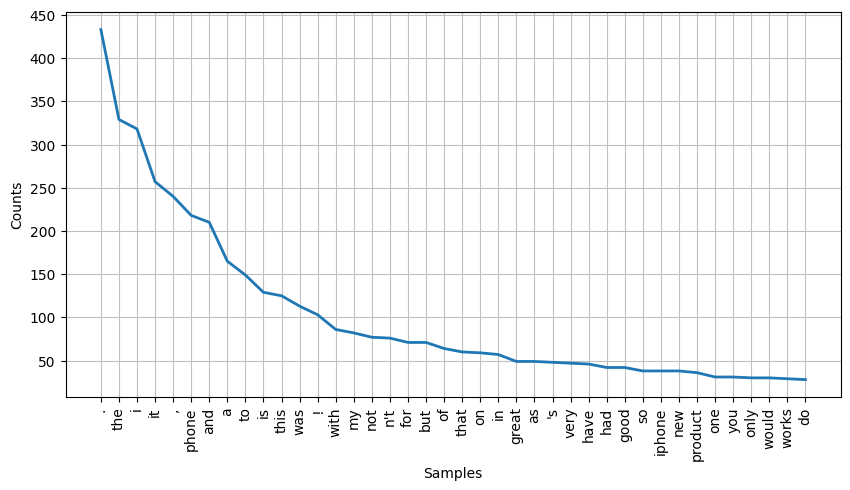

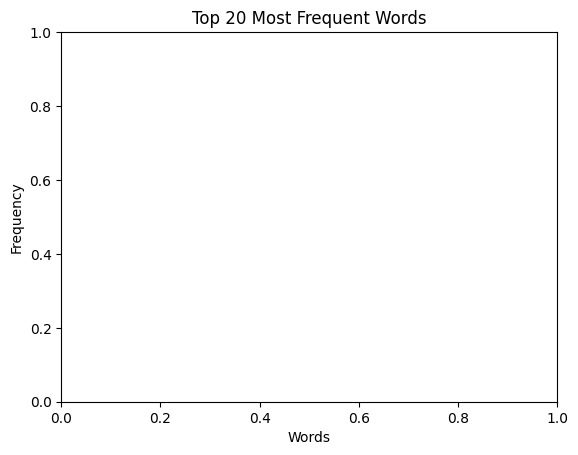

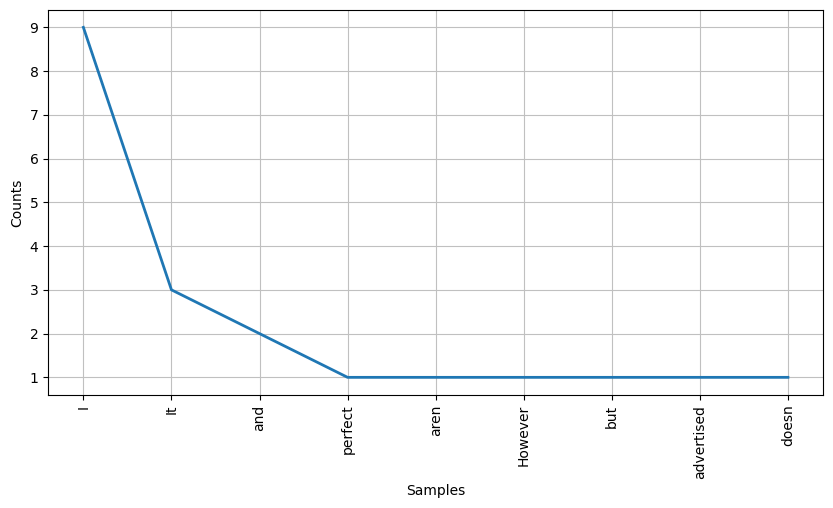

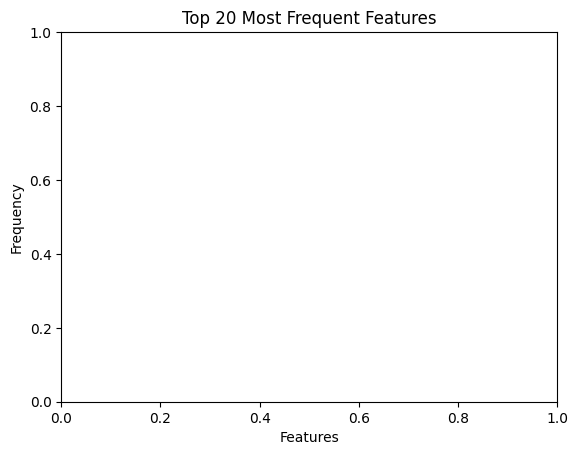

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Load your data from the JSON file
with open('text_samples_features1.json', 'r') as file:
    data = json.load(file)

# Convert JSON data to a Pandas DataFrame for easier manipulation
df = pd.DataFrame(data)

# Method 1: Keyword Frequency Analysis
all_words = [word_tokenize(text) for text in df['text']]
all_words_flat = [word.lower() for sublist in all_words for word in sublist]  # Convert to lowercase

word_freq = FreqDist(all_words_flat)

# Visualize top frequent words
plt.figure(figsize=(10, 5))
word_freq.plot(40, cumulative=False)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


# Assuming 'top_features' contains dictionaries directly
top_features = df['top_features'].apply(lambda x: [feature['Name'] for feature in x.values()])
all_features_flat = [feature for sublist in top_features for feature in sublist]
feature_freq = FreqDist(all_features_flat)

# Taking the absolute values of importance for visualization
importance_values = [abs(feature['Importance']) for features in df['top_features'] for feature in features.values()]
sorted_indices = sorted(range(len(importance_values)), key=lambda i: importance_values[i], reverse=True)
top_20_features = [feature for idx, feature in enumerate(all_features_flat) if idx in sorted_indices[:20]]

# Visualize top frequent features
plt.figure(figsize=(10, 5))
FreqDist(top_20_features).plot(20, cumulative=False)
plt.title('Top 20 Most Frequent Features')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()


In [30]:
top_features = df['top_features'].apply(lambda x: [(feature['Name'], feature['Importance']) for feature in x.values()])
print(top_features.head())


0    [(So, -0.8569552877332778), (phone, -0.7807638...
1    [(instance, 1.1095224568525255), (This, -0.844...
2    [(but, -0.6887495946838386), (expected, -0.659...
3    [(approx, 0.41076386790566516), (means, -0.379...
4    [(recommend, -1.5335513246336239), (phone, -1....
Name: top_features, dtype: object


In [32]:
print(df.head())


                                                text  \
0   Great phone, so glad I got one. So much you c...   
1  This is my third Nokia phone, and my second wi...   
2  Amazing Pictures just as expected. The Seller ...   
3  This phone died on 3-30-2016, that means it li...   
4  I would not recommend buying a certified refur...   

                                        top_features  
0  {'Feature 1': {'Name': 'So', 'Importance': -0....  
1  {'Feature 1': {'Name': 'instance', 'Importance...  
2  {'Feature 1': {'Name': 'but', 'Importance': -0...  
3  {'Feature 1': {'Name': 'approx', 'Importance':...  
4  {'Feature 1': {'Name': 'recommend', 'Importanc...  


In [33]:
print(all_features_flat)


['So', 'phone', 'so', 'Great', 'with', 'is', 'camera', 'one', 'and', 'super', 'instance', 'This', 'is', 'for', 'and', 'my', 'with', 'I', 'issue', 'BIG', 'but', 'expected', 'since', 'unavailable', 'I', 'the', 'm', 'and', 'shipped', '1020', 'approx', 'means', 'This', 'that', 'only', 'for', 'it', 'couldn', 'hundred', 't', 'recommend', 'phone', 'I', 'and', 'well', 'a', 'not', 'would', 'The', 'buying', 'been', 'the', 'a', 'fan', 'always', 'love', 'quality', 'Great', 'picture', 'phone', 'so', 'and', 'they', 'I', 'pleased', 'working', 'said', 'with', 'my', 'phone', 'slow', 'but', 'it', 'thought', 'its', 'would', 'I', 'price', 'Because', 's', 'I', 'and', 'a', 'on', 'but', 'it', 'that', 'far', 'It', 'recommend', 'forreal', 'like', 'and', 'sound', 'early', 'is', 'doesn', 'll', 'fone', 'nobody', 'If', 'hot', 'using', 'will', 'minutes', 'you', 'Viber', '30', 'get', 'too', 'I', 'and', 'The', 'the', 'this', 'them', 'iPhones', 've', 'was', 'beginning', 'I', 'This', 'the', 'm', 'even', 'China', 'while

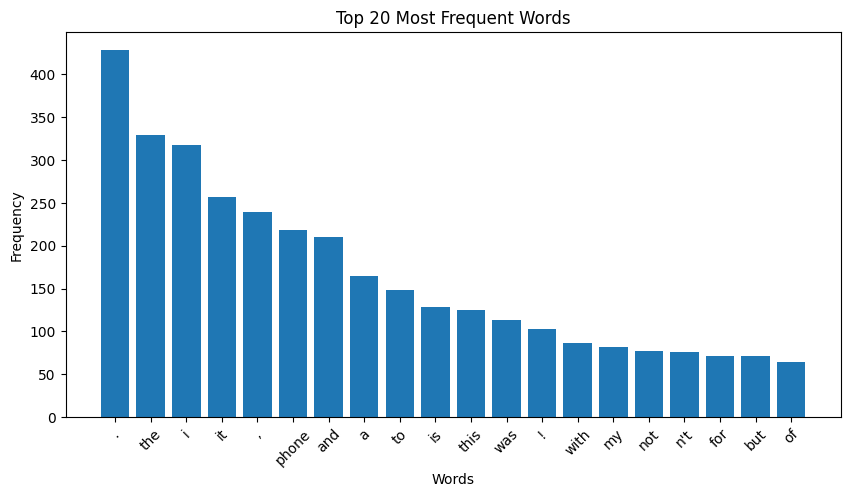

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from nltk.tokenize import word_tokenize
from collections import Counter

# Load your data from the JSON file
with open('text_samples_features1.json', 'r') as file:
    data = json.load(file)

# Convert JSON data to a Pandas DataFrame for easier manipulation
df = pd.DataFrame(data)

# Method 1: Keyword Frequency Analysis
all_words = ' '.join(df['text']).lower()  # Merge all text and convert to lowercase
tokens = word_tokenize(all_words)  # Tokenize the lowercased text
word_freq = Counter(tokens)  # Count word frequencies

# Visualize top frequent words
top_words = word_freq.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


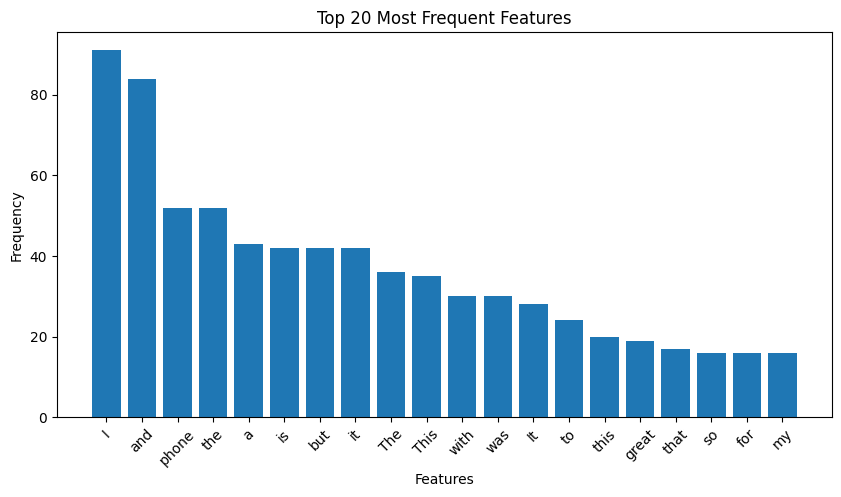

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from nltk.probability import FreqDist

# Load your data from the JSON file
with open('text_samples_features1.json', 'r') as file:
    data = json.load(file)

# Convert JSON data to a Pandas DataFrame for easier manipulation
df = pd.DataFrame(data)

# Assuming 'top_features' contains dictionaries directly
top_features = df['top_features'].apply(lambda x: [feature['Name'] for feature in x.values()])
all_features_flat = [feature for sublist in top_features for feature in sublist]

# Visualize top frequent features
feature_freq = FreqDist(all_features_flat)
top_20_features = feature_freq.most_common(20)

words, counts = zip(*top_20_features)

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 20 Most Frequent Features')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


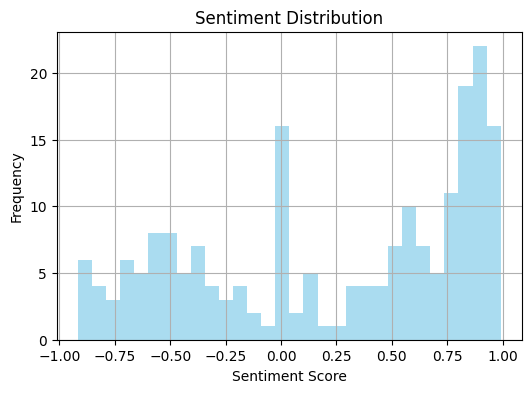

In [37]:
sia = SentimentIntensityAnalyzer()
sentiments = [sia.polarity_scores(text)['compound'] for text in df['text']]
df['sentiment_scores'] = sentiments

# Visualize sentiment distribution
plt.figure(figsize=(6, 4))
df['sentiment_scores'].hist(bins=30, color='skyblue', alpha=0.7)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize text data for LDA
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['text'])

# Apply LDA
num_topics = 5  # Adjust as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display top words per topic
feature_names = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([feature_names[i] for i in topic.argsort()[-10:]])  # Display top 10 words per topic


Topic 1:
['camera', 'works', 'really', 'perfect', 'work', 'good', 'product', 'doesn', 'great', 'phone']
Topic 2:
['stopped', 'months', 'iphone', 'amazon', 'just', 'love', 'product', 'great', 'working', 'phone']
Topic 3:
['works', 'got', 'working', 'like', 'new', 'product', 'great', 'battery', 'good', 'phone']
Topic 4:
['good', 'great', 'htc', 'days', 'does', 'problem', 'works', 'screen', 'excellent', 'phone']
Topic 5:
['buy', 'got', 'love', 'camera', 'good', 'use', 'great', 'iphone', 'new', 'phone']


In [42]:
import json
from collections import defaultdict

# Load the data from the JSON file
with open('text_samples_features1.json', 'r') as infile:
    data = json.load(infile)

# Dictionary to aggregate feature importance values
feature_importance_aggregated = defaultdict(float)
feature_count = defaultdict(int)

# Aggregate feature importance values across all samples
for sample in data:
    top_features = sample['top_features']
    for feature, info in top_features.items():
        feature_importance_aggregated[info['Name']] += info['Importance']
        feature_count[info['Name']] += 1

# Calculate average importance for each feature
feature_importance_average = {}
for feature, importance_sum in feature_importance_aggregated.items():
    count = feature_count[feature]
    average_importance = importance_sum / count
    feature_importance_average[feature] = average_importance

# Sort features by their average importance
sorted_features = sorted(feature_importance_average.items(), key=lambda x: x[1], reverse=True)

# Display top features with their average importance
num_top_features = 10
top_features = sorted_features[:num_top_features]
for rank, (feature, importance) in enumerate(top_features, start=1):
    print(f"Rank {rank}: Feature '{feature}' - Average Importance: {importance:.4f}")


Rank 1: Feature 'refurbed' - Average Importance: 1.2608
Rank 2: Feature 'instance' - Average Importance: 1.1095
Rank 3: Feature 'Excelent' - Average Importance: 1.0585
Rank 4: Feature 'Absoutley' - Average Importance: 0.8950
Rank 5: Feature 'perform' - Average Importance: 0.8592
Rank 6: Feature 'quick' - Average Importance: 0.8414
Rank 7: Feature 'wonderful' - Average Importance: 0.8228
Rank 8: Feature 'slow' - Average Importance: 0.7667
Rank 9: Feature 'sometimes' - Average Importance: 0.6686
Rank 10: Feature 'lags' - Average Importance: 0.6255


In [44]:
import json

# Load data from the JSON file
with open('text_samples_features.json', 'r') as file:
    data = json.load(file)

# Set a threshold for positive importance scores
threshold = 0.1  # Adjust as needed

# Extract words with positive importance scores
human_like_words = []
for entry in data:
    features = entry['top_features']
    for feature in features.values():
        importance = feature['Importance']
        if importance > threshold:
            human_like_words.append(feature['Name'])

# Print or use the list of words contributing to the text being more human-like
print("Words contributing to text being more human-like:", human_like_words)


Words contributing to text being more human-like: ['camera', 'instance', 'for', 'BIG', 'approx', 'only', 'over', 'been', 'the', 'a', 'fan', 'always', 'love', 'quality', 'picture', 'phone', 'so', 'they', 'working', 'slow', 'thought', 'Because', 'forreal']


In [47]:
import json
from collections import Counter

# Load data from the JSON file
with open('text_samples_features1.json', 'r') as file:
    data = json.load(file)

# Set thresholds for positive importance scores
threshold_min = 0.1  # Lower threshold
threshold_max = 0.7  # Upper threshold

# Extract words within the specified importance score range
human_like_words = []
for entry in data:
    features = entry['top_features']
    for feature in features.values():
        importance = feature['Importance']
        if threshold_min < importance < threshold_max:
            human_like_words.append(feature['Name'])

# Filter words based on frequency
word_counter = Counter(human_like_words)
# You can set a threshold for the minimum frequency to include words
min_frequency = 3  # Adjust as needed
filtered_words = [word for word, count in word_counter.items() if count >= min_frequency]

# Print or use the list of words contributing to text being more human-like
print("Words contributing to text being more human-like:", filtered_words)


Words contributing to text being more human-like: ['camera', 'only', 'the', 'a', 'love', 'phone', 'in', 'is', 'it', 'thing', 'to', 'very', 'The', 'was', 'works', 'It', 'great', 'side', 'really', 'Not', 'I', 'and', 'on', 'product', 'working', 'work', 'received']


In [48]:
import json
from collections import Counter

# Load data from the JSON file
with open('text_samples_features.json', 'r') as file:
    data = json.load(file)

# Set thresholds for negative importance scores
threshold_min = -0.7  # Lower threshold
threshold_max = -0.3  # Upper threshold

# Extract words within the specified importance score range
chatGPT_like_words = []
for entry in data:
    features = entry['top_features']
    for feature in features.values():
        importance = feature['Importance']
        if threshold_min < importance < threshold_max:
            chatGPT_like_words.append(feature['Name'])

# Filter words based on frequency
word_counter = Counter(chatGPT_like_words)
# Set a threshold for the minimum frequency to include words
min_frequency = 3  # Adjust as needed
filtered_words = [word for word, count in word_counter.items() if count >= min_frequency]

# Print or use the list of words contributing to text being more ChatGPT-like
print("Words contributing to text being more ChatGPT-like:", filtered_words)


Words contributing to text being more ChatGPT-like: ['with', 'and', 'but']


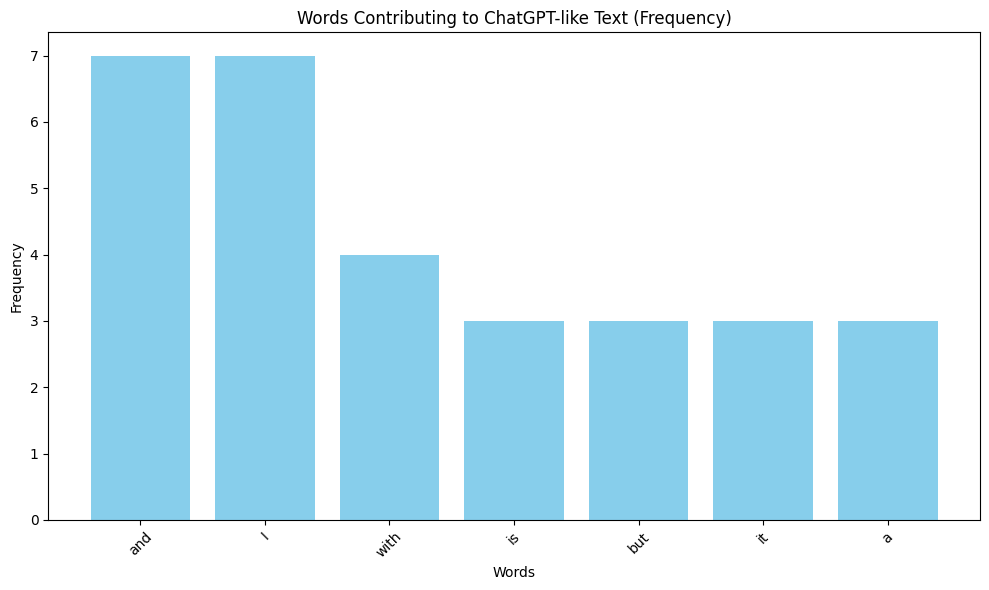

In [52]:
import json
from collections import Counter
import matplotlib.pyplot as plt

# Load data from the JSON file
with open('text_samples_features.json', 'r') as file:
    data = json.load(file)

# Set thresholds for negative importance scores
threshold_min = -3.0  # Lower threshold
threshold_max = -0.01  # Upper threshold

# Extract words within the specified importance score range
chatGPT_like_words = []
for entry in data:
    features = entry['top_features']
    for feature in features.values():
        importance = feature['Importance']
        if threshold_min < importance < threshold_max:
            chatGPT_like_words.append(feature['Name'])

# Count occurrences of words
word_counter = Counter(chatGPT_like_words)
# Filter words based on frequency
min_frequency = 3  # Adjust as needed
filtered_words = {word: count for word, count in word_counter.items() if count >= min_frequency}

# Sort words by frequency
sorted_words = dict(sorted(filtered_words.items(), key=lambda item: item[1], reverse=True))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_words)), list(sorted_words.values()), align='center', color='skyblue')
plt.xticks(range(len(sorted_words)), list(sorted_words.keys()), rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Words Contributing to ChatGPT-like Text (Frequency)')
plt.tight_layout()

# Show plot
plt.show()


In [63]:
import json

# Load the JSON file containing feature importance
with open('text_samples_features1.json', 'r') as file:
    data = json.load(file)

# Define your list of stop words (you can expand this list)
stop_words=["doesn't","couldn't","a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]
# Remove stop words from feature names
for item in data:
    features = item['top_features']
    for _, feature_info in features.items():
        feature_name = feature_info['Name']
        words = feature_name.split()
        words = [word for word in words if word.lower() not in stop_words]
        processed_feature_name = ' '.join(words)
        feature_info['Name'] = processed_feature_name

# Save the updated data to a new JSON file
with open('kk2.json', 'w') as outfile:
    json.dump(data, outfile, indent=4)

print("Data with removed stop words saved to feature_importance_without_stopwords.json")


Data with removed stop words saved to feature_importance_without_stopwords.json


In [58]:
import json
from collections import Counter

# Load data from the JSON file
with open('kk1.json', 'r') as file:
    data = json.load(file)

# Set thresholds for positive importance scores
threshold_min = 0.1  # Lower threshold
threshold_max = 0.7  # Upper threshold

# Extract words within the specified importance score range
human_like_words = []
for entry in data:
    features = entry['top_features']
    for feature in features.values():
        importance = feature['Importance']
        if threshold_min < importance < threshold_max:
            human_like_words.append(feature['Name'])

# Filter words based on frequency
word_counter = Counter(human_like_words)
# You can set a threshold for the minimum frequency to include words
min_frequency = 3  # Adjust as needed
filtered_words = [word for word, count in word_counter.items() if count >= min_frequency]

# Print or use the list of words contributing to text being more human-like
print("Words contributing to text being more human-like:", filtered_words)

Words contributing to text being more human-like: ['camera', '', 'love', 'phone', 'thing', 'works', 'great', 'side', 'product', 'working', 'work', 'received']


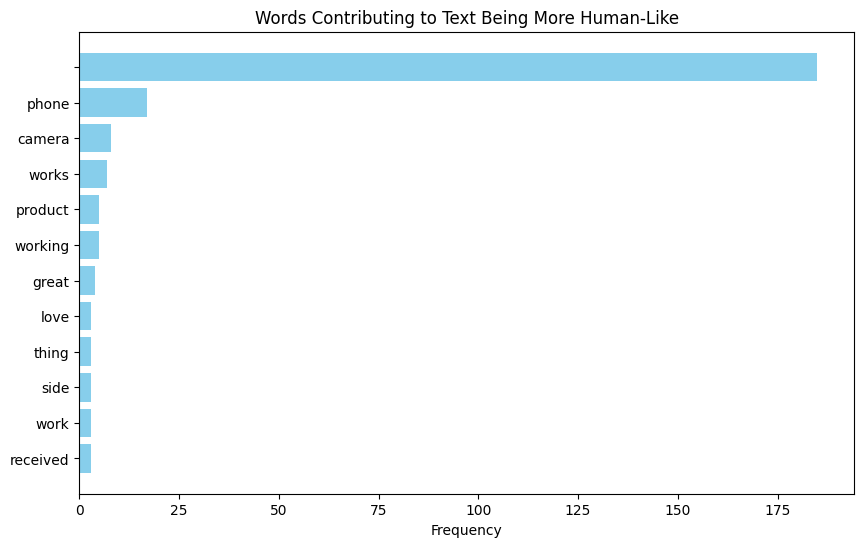

In [59]:
import json
from collections import Counter
import matplotlib.pyplot as plt

# Load data from the JSON file
with open('kk1.json', 'r') as file:
    data = json.load(file)

# Set thresholds for positive importance scores
threshold_min = 0.1  # Lower threshold
threshold_max = 0.7  # Upper threshold

# Extract words within the specified importance score range
human_like_words = []
for entry in data:
    features = entry['top_features']
    for feature in features.values():
        importance = feature['Importance']
        if threshold_min < importance < threshold_max:
            human_like_words.append(feature['Name'])

# Filter words based on frequency
word_counter = Counter(human_like_words)
# You can set a threshold for the minimum frequency to include words
min_frequency = 3  # Adjust as needed
filtered_words = {word: count for word, count in word_counter.items() if count >= min_frequency}

# Sort the words and their frequencies in descending order
sorted_words = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)
words, frequencies = zip(*sorted_words)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title('Words Contributing to Text Being More Human-Like')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [62]:
import json
from collections import Counter

# Load data from the JSON file
with open('kk1.json', 'r') as file:
    data = json.load(file)

# Set thresholds for negative importance scores
threshold_min = -9999  # Lower threshold
threshold_max = -0.00  # Upper threshold

# Extract words within the specified importance score range
chatGPT_like_words = []
for entry in data:
    features = entry['top_features']
    for feature in features.values():
        importance = feature['Importance']
        if threshold_min < importance < threshold_max:
            chatGPT_like_words.append(feature['Name'])

# Filter words based on frequency
word_counter = Counter(chatGPT_like_words)
# Set a threshold for the minimum frequency to include words
min_frequency = 3  # Adjust as needed
filtered_words = [word for word, count in word_counter.items() if count >= min_frequency]

# Print or use the list of words contributing to text being more ChatGPT-like
print("Words contributing to text being more ChatGPT-like:", filtered_words)


Words contributing to text being more ChatGPT-like: ['', 'phone', 'Great', 'couldn', 'recommend', 'doesn', 've', 'iPhone', 'Amazon', 'unlocked', 'great', 'warranty', 'problem', 'haven', 'condition', 'wouldn', 'amazing', 'good', 'Phone', 'bought', 'won', 'disappointed', 'advertised', 'purchased', 'iphone', 'scratches', 'excellent', 'quality', 'product', 'Apple', 'don', 'time', 'love']


<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

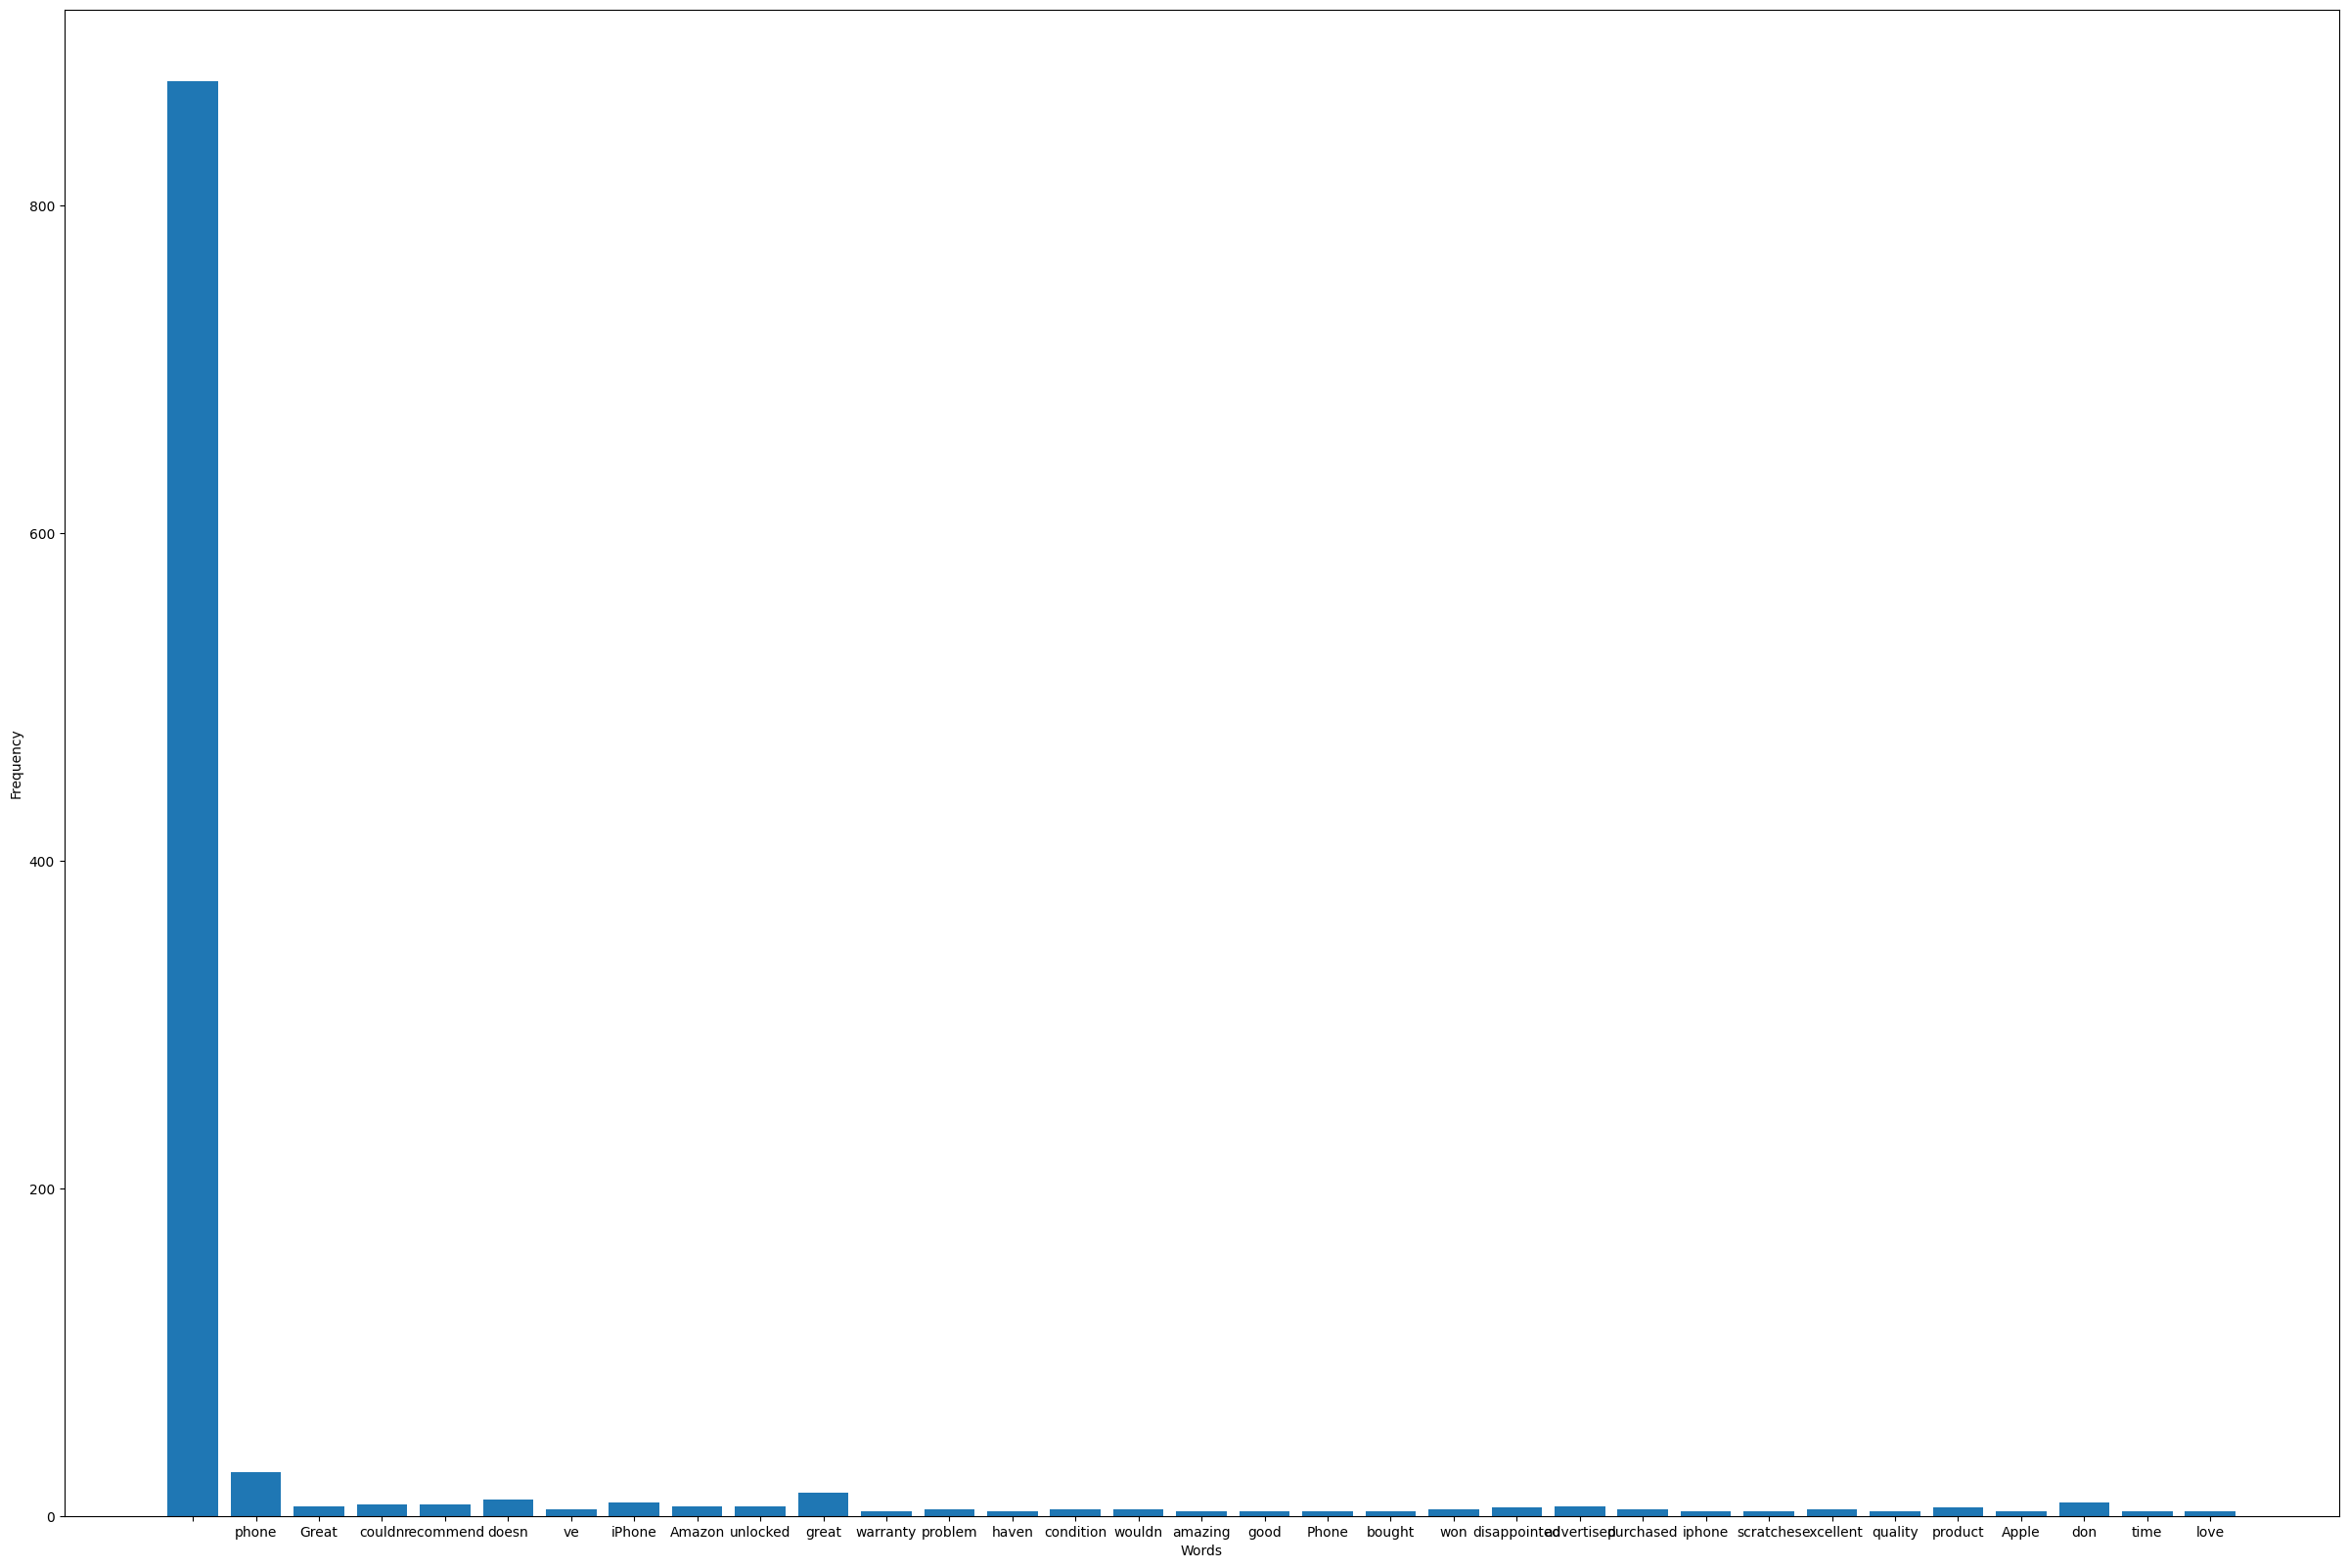

In [65]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# Load data from the JSON file
with open('kk1.json', 'r') as file:
    data = json.load(file)

# Set thresholds for negative importance scores
threshold_min = -9999  # Lower threshold
threshold_max = -0.00  # Upper threshold

# Extract words within the specified importance score range
chatGPT_like_words = []
for entry in data:
    features = entry['top_features']
    for feature in features.values():
        importance = feature['Importance']
        if threshold_min < importance < threshold_max:
            chatGPT_like_words.append(feature['Name'])

# Filter words based on frequency
word_counter = Counter(chatGPT_like_words)
# Set a threshold for the minimum frequency to include words
min_frequency = 3  # Adjust as needed
filtered_words = {word: count for word, count in word_counter.items() if count >= min_frequency}

# Plotting the frequencies of ChatGPT-like words
plt.figure(figsize=(30, 20))
plt.bar(filtered_words.keys(), filtered_words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title


<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

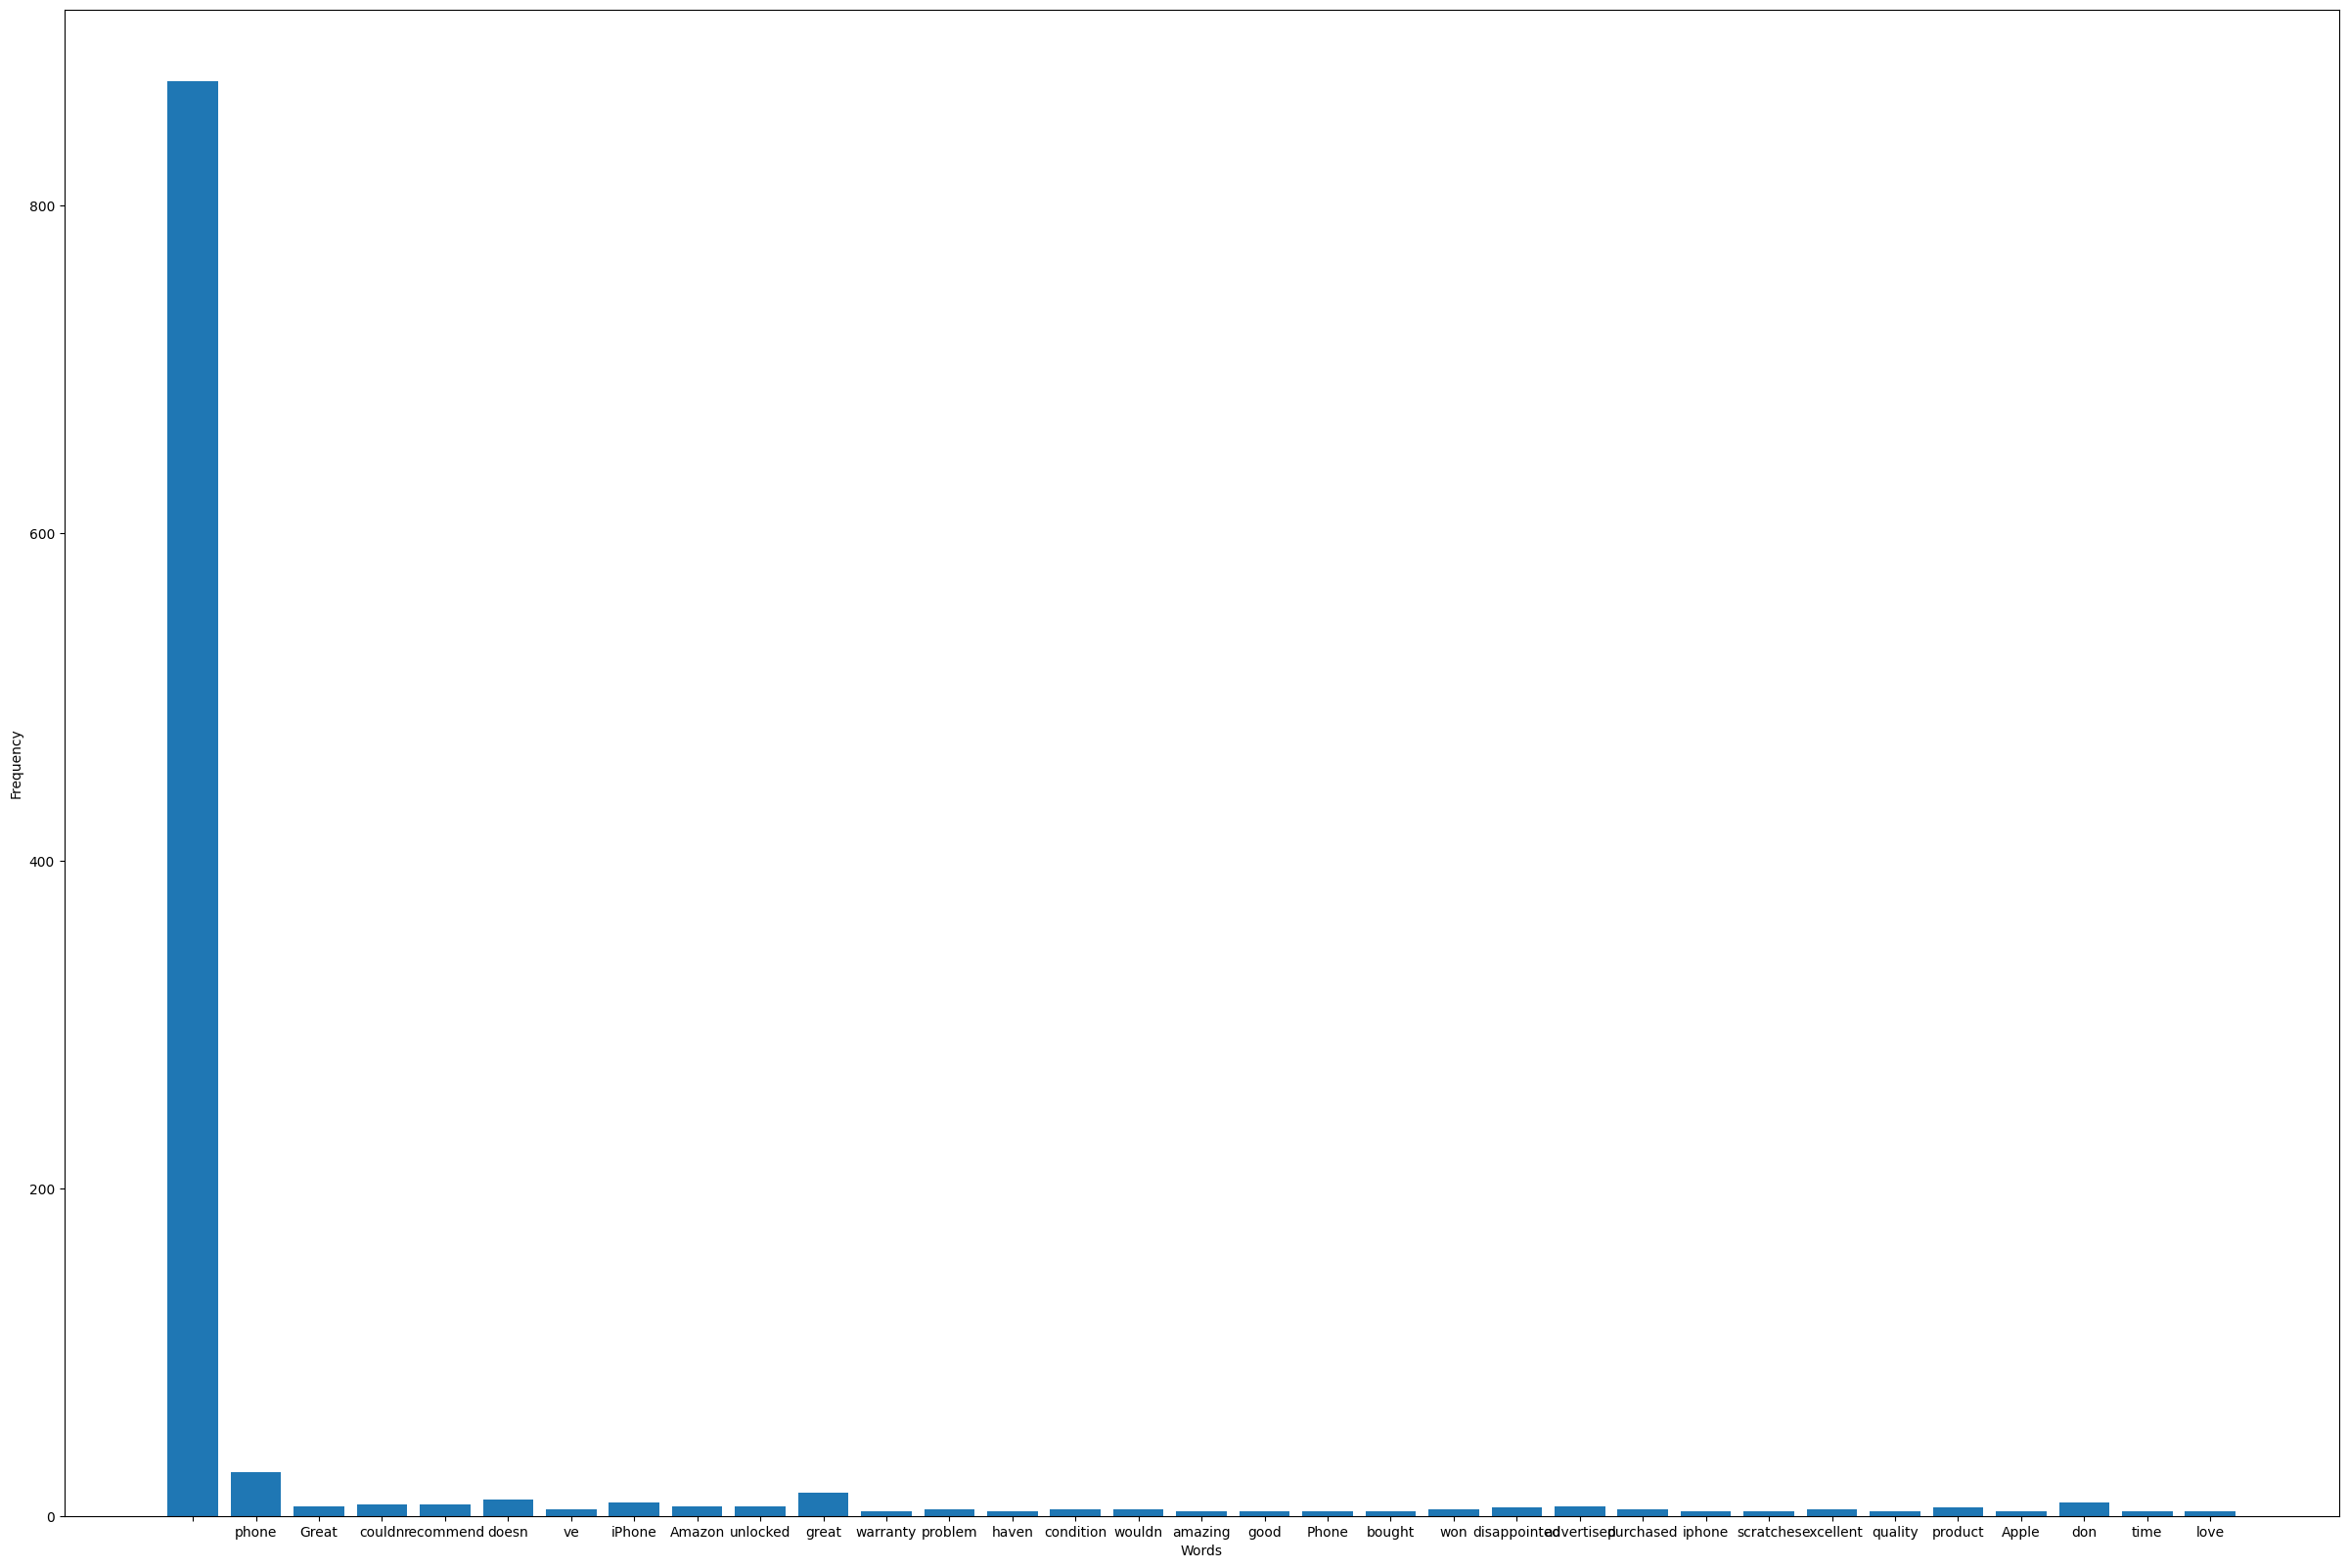

In [66]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# Load data from the JSON file
with open('kk2.json', 'r') as file:
    data = json.load(file)

# Set thresholds for negative importance scores
threshold_min = -9999  # Lower threshold
threshold_max = -0.00  # Upper threshold

# Extract words within the specified importance score range
chatGPT_like_words = []
for entry in data:
    features = entry['top_features']
    for feature in features.values():
        importance = feature['Importance']
        if threshold_min < importance < threshold_max:
            chatGPT_like_words.append(feature['Name'])

# Filter words based on frequency
word_counter = Counter(chatGPT_like_words)
# Set a threshold for the minimum frequency to include words
min_frequency = 3  # Adjust as needed
filtered_words = {word: count for word, count in word_counter.items() if count >= min_frequency}

# Plotting the frequencies of ChatGPT-like words
plt.figure(figsize=(30, 20))
plt.bar(filtered_words.keys(), filtered_words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title


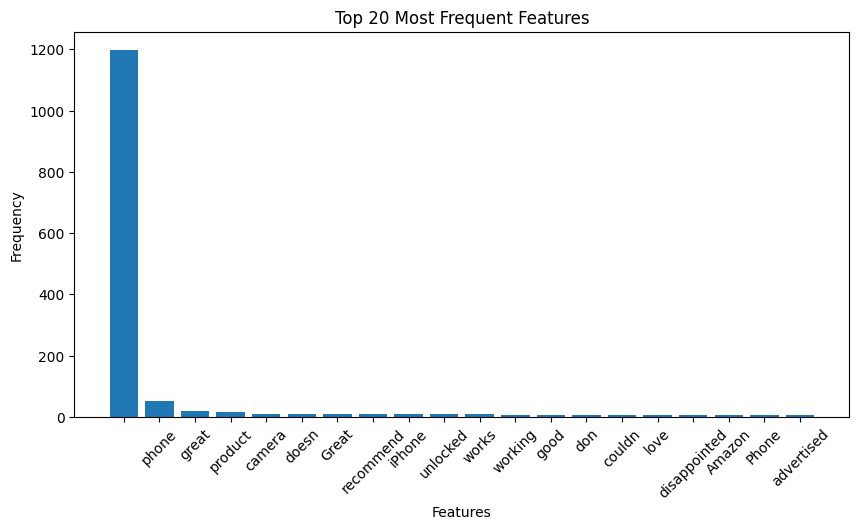

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from nltk.probability import FreqDist

# Load your data from the JSON file
with open('kk2.json', 'r') as file:
    data = json.load(file)

# Convert JSON data to a Pandas DataFrame for easier manipulation
df = pd.DataFrame(data)

# Assuming 'top_features' contains dictionaries directly
top_features = df['top_features'].apply(lambda x: [feature['Name'] for feature in x.values()])
all_features_flat = [feature for sublist in top_features for feature in sublist]

# Visualize top frequent features
feature_freq = FreqDist(all_features_flat)
top_20_features = feature_freq.most_common(20)

words, counts = zip(*top_20_features)

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 20 Most Frequent Features')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


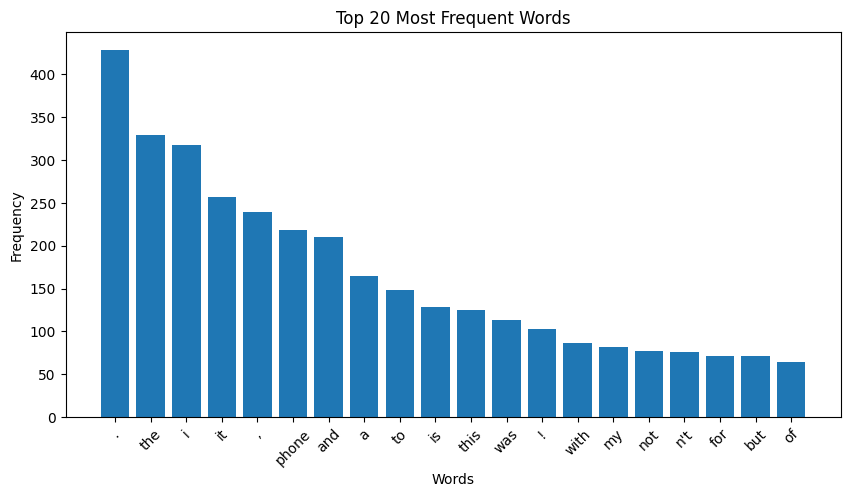

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from nltk.tokenize import word_tokenize
from collections import Counter

# Load your data from the JSON file
with open('kk2.json', 'r') as file:
    data = json.load(file)

# Convert JSON data to a Pandas DataFrame for easier manipulation
df = pd.DataFrame(data)

# Method 1: Keyword Frequency Analysis
all_words = ' '.join(df['text']).lower()  # Merge all text and convert to lowercase
tokens = word_tokenize(all_words)  # Tokenize the lowercased text
word_freq = Counter(tokens)  # Count word frequencies

# Visualize top frequent words
top_words = word_freq.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
